In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import random_sample as random
pi=np.pi

# Projection

# Linear transformation

## Vector Matrix multiplication
What happens when you hit a vector $\mathbf{x}$ with a matrix $\mathbf{P}$

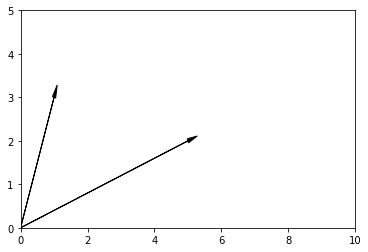

In [11]:
X=np.array([1,3])
P=np.array([[2,1],[-1,1]])
T=np.matmul(P,X.T)
u = [0,0,X[0],X[1]]
v = [0,0,T[0],T[1]]
ax = plt.axes()
plt.xlim(0,10)
plt.ylim(0,5)
ax.arrow(0, 0, X[0], X[1], head_width=0.1, head_length=0.3, fc='k', ec='k')
ax.arrow(0, 0, T[0], T[1], head_width=0.1, head_length=0.3, fc='k', ec='k')
plt.show()

# TO DO
Figure out what else other than rotation and scaling the matrix P can do to vector x

In [23]:
def rand_in_circle(a=1):
    angle = 2*pi*random()
    r = np.sqrt( (a*np.cos(angle))**2 + (a*np.sin(angle))**2 )
    r *= random()
    x = r * np.cos(angle)
    y = r * np.sin(angle)
    return np.array((x,y))

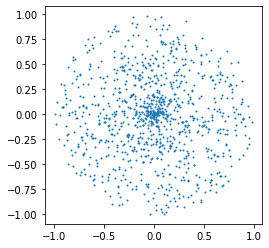

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
X = np.array([rand_in_circle(1) for i in np.arange(1000)])
ax.scatter(X[:,0], X[:,1], s=1)
ax.set_aspect(1)
plt.show() # Figure attached

## Scaling matrix
\begin{bmatrix}
\sigma_1  & 0\\
0 & \sigma_2
\end{bmatrix}

In [25]:
sigma1=5
sigma2=1 
theta=pi/4
Scale  = np.array([[sigma1,0],[0,sigma2]])

## Rotation Matrix
\begin{bmatrix}
cos(\theta)  & -sin(\theta)\\
sin(\theta) & cos(\theta)
\end{bmatrix}

In [26]:

Rotate =np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])

## Apply the scaling transformation


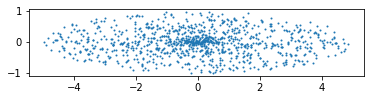

In [27]:
scaledX=np.matmul(Scale,X.T)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(scaledX[0,:], scaledX[1,:], s=1)
ax.set_aspect(1)
plt.show() # Figure attached

In [28]:
RotX = np.matmul(Rotate,scaledX)

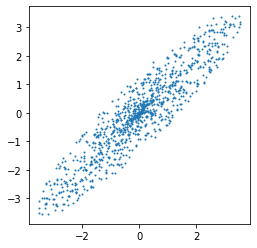

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(RotX[0,:], RotX[1,:], s=1)
ax.set_aspect(1)
plt.show() 

# TO DO
Study the impact of chaning the values of $\sigma_1, \sigma_2, \theta$

## Deflating the matrix X by removing all the variation along a particular direction 

Compute the unit vector along a direction given by $\theta$

In [36]:
p=np.array([np.cos(theta),np.sin(theta)])
phat=p/np.linalg.norm(p)
phat=phat.reshape(-1,1)

In [37]:
projection_RotX_along_phat = phat.dot( (phat.T).dot(RotX) )

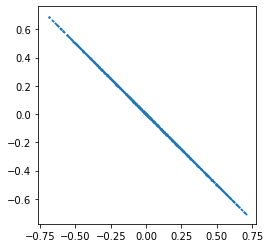

In [38]:
RotX_deflated = RotX - projection_RotX_along_phat
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(RotX_deflated[0,:], RotX_deflated[1,:], s=1)
ax.set_aspect(1)
plt.show() 